In [76]:
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib
from datetime import datetime
import numpy as np
import pandas as pd

    
def findwindowq(values, window, Q):
        mx = len(values)
        windowave = []
        for k in range(0,mx):
            left = right = k
            if k > window:
                left = k - window
            if (k+window) < mx:
                right = k + window
            windowave.append( np.quantile( values[left:right], Q ) )
        return windowave

def plotqunt(df):
    plt.figure(figsize=(9,3))
        
    x, y = df.Days, df.Close
    plt.scatter(x, y,  s=1, c='black')
    plt.scatter(x, findwindowave(y, window),  s=10, c='black')
    #plt.scatter(x, df.Low,  s=1, c='blue')
    vals, labs = thinticks(df, showeach)
    trap = plt.xticks(vals, labs, rotation=90)
    plt.ylabel('Close $')
    plt.xlabel('Date')
    plt.title(title_string)
    
    plt.show()

In [26]:
symbol,duration = 'NIO','35d'
df = get_stock_data(symbol,duration)

In [89]:
def rgb_gain(gain, mingain, green_point, maxgain):
    clrs = []
    for gp in gain:
        if gp < green_point:
            # (1,0,0) -> (5/11,5/11,1/11)
            # slider = 0 when gp==greenpoint, 1 when gp = mingain
            slider = (green_point - gp) / (green_point - mingain)
            rc = 1.00
            gc = (1-slider)
            bc = 0
            clrs.append((rc,gc,bc))
        if gp >= green_point:
            # gp == green_point, slider = 0 
            slider = (gp - green_point) / (maxgain - green_point)
            bc = slider
            gc = 1.00 - bc
            clrs.append((0,gc,bc))
    return clrs

gain, mingain, green_point, maxgain = [0.02, 0.1, 0.5, 0.9, 0.98], 0.02, 0.5, 1.00
clrs = rgb_gain(gain, mingain, green_point, maxgain)

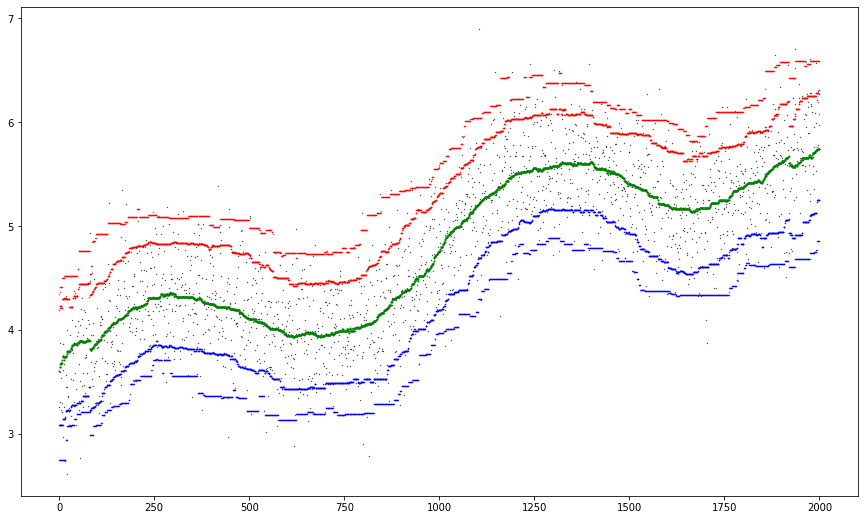

In [110]:
def make_mock_df(length, theta, slope, sigma):
    x = np.array( range(0,length) )
    y = ( 1.00 + np.sin(theta*x) )/2 
    y = np.random.normal(y, sigma, length)
    y = y + x*slope + 3
    return pd.DataFrame.from_dict({'x': x, 'y': y})

length = 2000 
m = 4
theta, slope, sigma = (m*3.14)/(length), 1.25/1000, 1.25
df = make_mock_df(length, theta, slope, std)

window = 80
df['Q02'] = findwindowq(df.y, window, 0.02)
df['Q10'] = findwindowq(df.y, window, 0.10)
df['Q50'] = findwindowq(df.y, window, 0.5)
df['Q90'] = findwindowq(df.y, window, 0.90)
df['Q98'] = findwindowq(df.y, window, 0.98)

fig, ax1 = plt.subplots()
fig.set_figheight(9)
fig.set_figwidth(15)
    
plt.scatter(df.x, df.y,  s=0.1, c='black')
plt.scatter(df.x, df.Q02,  s=.15, c='blue')
plt.scatter(df.x, df.Q10,  s=.3, c='blue')
plt.scatter(df.x, df.Q50,  s=1, c='green')
plt.scatter(df.x, df.Q90,  s=.3, c='red')
plt.scatter(df.x, df.Q98,  s=.15, c='red')


In [27]:
values, window, Q = df.Close, 3, 0.02
df['Q02'] = findwindowq(values, window, Q)

Q =0.10
df['Q10'] = findwindowq(values, window, Q)

Q =0.50
df['Q50'] = findwindowq(values, window, Q)

Q =0.90
df['Q90'] = findwindowq(values, window, Q)

Q =0.98
df['Q98'] = findwindowq(values, window, Q)

In [28]:
df.head(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Company,Date,Days,Daystring,Q02,Q10,Q50,Q90,Q98
0,21.66,21.92,21.07,21.59,60860100,0,0,NIO,2020-10-05,0,2020.10.05,20.7056,20.848,21.560,21.584,21.5888
1,21.71,21.94,20.60,20.67,73217100,0,0,NIO,2020-10-06,1,2020.10.06,20.7008,20.824,21.440,21.536,21.5552
2,21.06,21.77,20.79,21.56,59354300,0,0,NIO,2020-10-07,2,2020.10.07,21.4412,21.446,21.470,21.542,21.5564
3,22.05,22.45,21.29,21.44,77719600,0,0,NIO,2020-10-08,3,2020.10.08,21.4412,21.446,21.470,21.774,21.8348
4,21.62,21.74,21.32,21.47,37329000,0,0,NIO,2020-10-09,4,2020.10.09,20.7470,21.055,21.515,21.735,21.8270
5,21.88,22.18,21.55,21.85,45476800,0,0,NIO,2020-10-12,7,2020.10.12,21.4430,21.455,21.590,24.175,26.0350
6,21.86,21.97,21.17,21.62,42581500,0,0,NIO,2020-10-13,8,2020.10.13,21.4430,21.455,21.735,27.285,27.9130
7,23.98,26.96,23.73,26.50,387903300,0,0,NIO,2020-10-14,9,2020.10.14,21.4850,21.545,24.175,28.275,28.4390
8,27.20,29.23,25.78,28.07,385210600,0,0,NIO,2020-10-15,10,2020.10.15,21.6430,21.735,27.065,28.275,28.4390
9,29.18,29.40,27.94,28.48,186764700,0,0,NIO,2020-10-16,11,2020.10.16,22.1080,24.060,27.795,28.275,28.4390


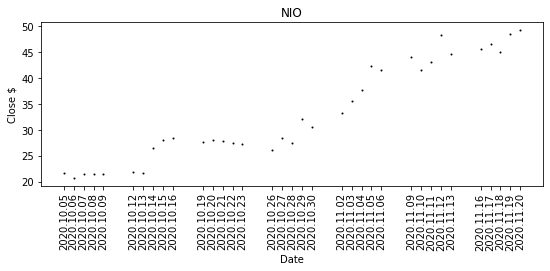

In [30]:
def thinticks(df, showeach):
    val = df.Days
    lab = df.Date
    vals = []
    labs = []
    k = 0
    while k < len(val):
        vals.append( val[k] )
        labs.append( lab[k].strftime('%Y.%m.%d') )
        k = k + showeach
    return vals, labs

def plotqunt(df, showeach,title_string):
    plt.figure(figsize=(9,3))
        
    x, y = df.Days, df.Close
    plt.scatter(x, y,  s=1, c='black')
    vals, labs = thinticks(df, showeach)
    trap = plt.xticks(vals, labs, rotation=90)
    plt.ylabel('Close $')
    plt.xlabel('Date')
    plt.title(title_string)
    
    plt.show()
  
title_string, showeach = 'NIO', 1
plotqunt(df,showeach,title_string)